In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

In [8]:
# Create a simple dataset
data = {
    "Size (sqft)": [2000, 1500, 1800, 1200, 2500],
    "Price ($)": [300000, 200000, 250000, 180000, 500000]
}


In [9]:
df = pd.DataFrame(data)

In [10]:
# Separate features and target

X = df[["Size (sqft)"]].values
y = df["Price ($)"].values


In [11]:
# Split the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

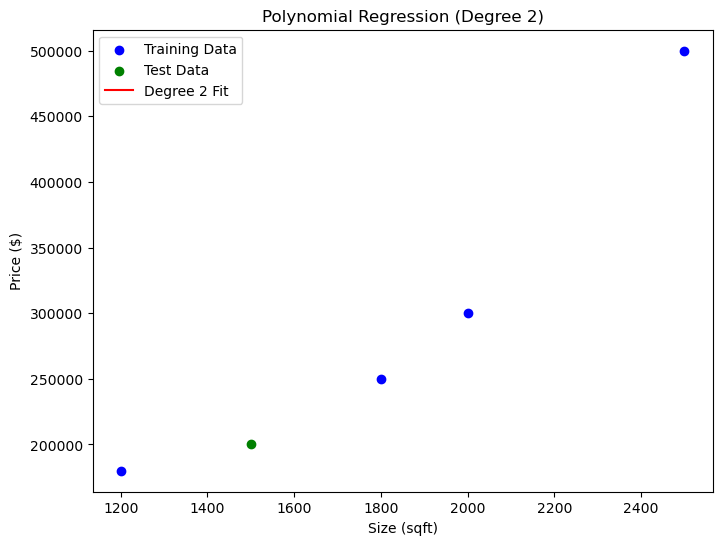

Degree 2 Polynomial Regression
Mean Squared Error: 6596396.18
--------------------------------------------------


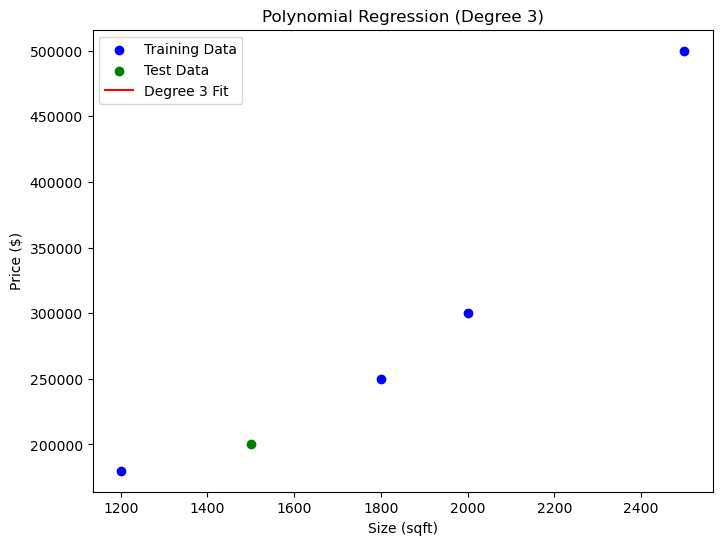

Degree 3 Polynomial Regression
Mean Squared Error: 2717063.19
--------------------------------------------------


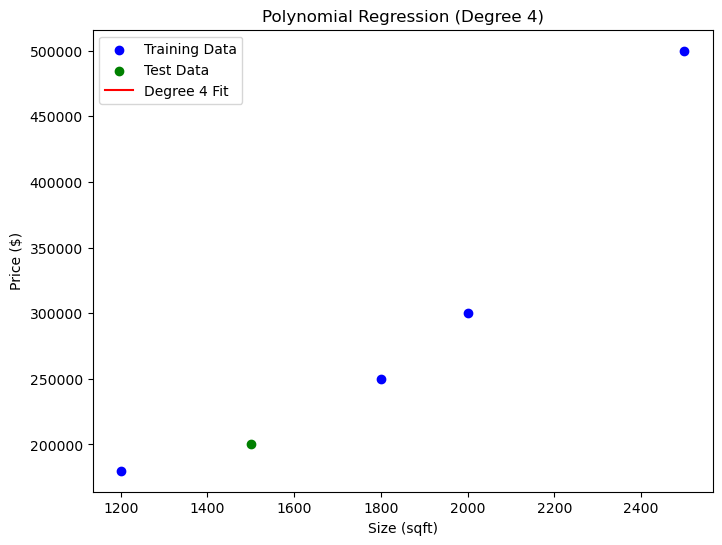

Degree 4 Polynomial Regression
Mean Squared Error: 3247387.71
--------------------------------------------------


In [12]:
# Function to fit and visualize polynomial regression for various degrees
def polynomial_regression_analysis(degree):
    # Create a polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, color="blue", label="Training Data")
    plt.scatter(X_test, y_test, color="green", label="Test Data")
    
    # Generate smooth predictions for visualization
    X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_curve = model.predict(X_curve)
    plt.plot(X_curve, y_curve, color="red", label=f"Degree {degree} Fit")
    
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("Size (sqft)")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()
    
    print(f"Degree {degree} Polynomial Regression")
    print(f"Mean Squared Error: {mse:.2f}")
    print("-" * 50)